### Why do we need Graph Analysis
1. Detecting financial crimes such as money laundering

2. Spotting fraud, which applies to fraudulent transactions and applications in banking, benefits fraud in government, applications and claims fraud in insurance and fraudulent activities in telecommunications

3. Preventing crime and performing counterterrorism

4. Applying influencer analysis in social network communities

5. Performing grid and network quality of service such as identifying weaknesses in power grids, water grids and transportation networks as well as helping prevent cybercrime attacks on computer networks

6. Optimizing routes in the airlines and retail and manufacturing industries as well as for supply distribution chains and logistics

7. Conducting research in life sciences (bioinformatics) including medical research, disease pathologies and so on

### Step 1
https://www.datacamp.com/community/tutorials/social-network-analysis-python
#### Create dataframe to analyze graph data

In [33]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Ryan Reynolds','Ryan Gosling')
G_symmetric.add_edge('Ryan Reynolds','Dwayne Johnson')
G_symmetric.add_edge('Ryan Reynolds','Bart Simpson')
G_symmetric.add_edge('Ryan Reynolds','Donald Trump')
G_symmetric.add_edge('Ryan Gosling','Dwayne Johnson')
G_symmetric.add_edge('Ryan Gosling','Bart Simpson')
G_symmetric.add_edge('Ryan Gosling','Donald Trump')
G_symmetric.add_edge('Donald Trump','Dwayne Johnson')
G_symmetric.add_edge('Bart Simpson','Doug Ford')
G_symmetric.add_edge('Ryan Reynolds','Doug Ford')

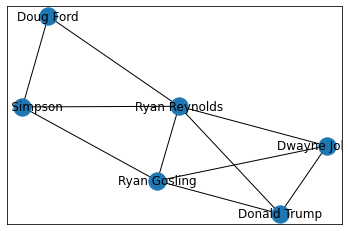

In [34]:
nx.draw_networkx(G_symmetric)

#### Symmetric Networks
The first network of actors that we created above is a symmetric network because the relationship "working together in a movie" is a symmetric relationship. If A is related to B, B is also related to A. Let us create the network we saw above in NetworkX.

#### Asymmetric Networks
What if the relationship between nodes is 'child of', then the relationship is no longer symmetric.

If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network.

We can build the asymmetric network in NetworkX using DiGraph method, which is short of Directional Graph. Let us make an asymmetric graph.

In [3]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

Now we visualize it. We can use the draw_networkx() function as before. However, it is possible that nodes do not separate out and are distinctly visible in the network drawn. To take care of this, we can use the function to force a layout, which positions the nodes in a manner that we can distinctly see them. We can accomplish this using spring_layout() function, followed by the draw_networkx() function.

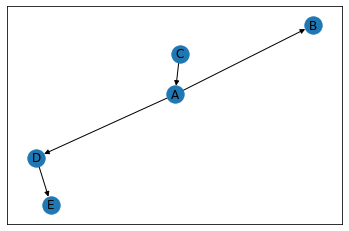

In [4]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### Weighted Networks
Till now we had networks without weights, but it is possible that networks are made with weights

for example, if in our initial network we consider the number of movies done together as a weight, we will get a Weighted Network.

Let us make one again of the actors, but this time we add weight to the network, each edge has a weight signifying the number of movies they have done together.

In [35]:

G_weighted = nx.Graph()
G_weighted.add_edge('Ryan Reynolds','Ryan Gosling', weight=25)
G_weighted.add_edge('Ryan Reynolds','Dwayne Johnson', weight=8)
G_weighted.add_edge('Ryan Reynolds','Bart Simpson', weight=11)
G_weighted.add_edge('Ryan Reynolds','Donald Trump', weight=4)
G_weighted.add_edge('Ryan Gosling','Dwayne Johnson', weight=4)
G_weighted.add_edge('Ryan Gosling','Bart Simpson',weight=7)
G_weighted.add_edge('Ryan Gosling','Donald Trump', weight=1)
G_weighted.add_edge('Donald Trump','Dwayne Johnson',weight=1) 
G_weighted.add_edge('Bart Simpson','Doug Ford',weight=5)
G_weighted.add_edge('Ryan Reynolds','Doug Ford',weight=7)

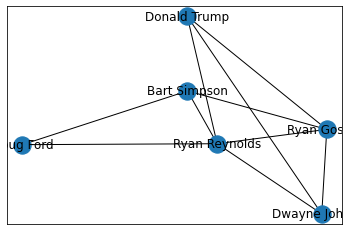

In [36]:
nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

The figure above shows the weighted network of actors in a circular layout. The edge width specifies the weight between two nodes.t is not clear from the image unfortunately

### Multigraph
We can give different attributes to the edges. 

For example, we can define a relation of neighbor between two nodes 'A' and 'B' using relation attribute. 

If within a network two nodes are connected with two different edges (relations) we have a multigraph. 

We can make a multigraph utilizing the MultiGraph class.

In [10]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='colleague')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')

0

In [12]:
G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'D')])

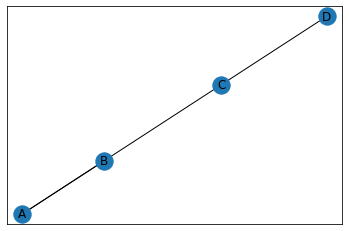

In [9]:
nx.draw_networkx(G)

### Network Connectivity
Now the network is made, can we know more about a particular node in the network? Well yes, let us explore some of them.

Degree
Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [15]:
nx.degree(G_symmetric, 'Bart Simpson')

2

### Clustering Coefficient
It is observed that people who share connections in a social network tend to form associations. 

In other words, there is a tendency in a social network to form clusters. 

We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other. To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes

In [17]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [16]:
nx.clustering(G_symmetric,'Donald Trump')

1.0

In [9]:
nx.clustering(G_symmetric,'Ryan Gosling')

0.6666666666666666

#### Find shortest path

In [37]:
nx.shortest_path(G_weighted, 'Doug Ford', 'Ryan Gosling')

['Doug Ford', 'Ryan Reynolds', 'Ryan Gosling']

In [39]:
nx.shortest_path(G_symmetric, 'Doug Ford', 'Ryan Gosling')

['Doug Ford', 'Ryan Reynolds', 'Ryan Gosling']

In [30]:
T = nx.bfs_tree(G_symmetric, 'Donald Trump')

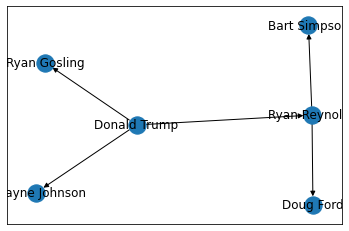

In [31]:
nx.draw_networkx(T)

### Network Influencers
Above we learned some of the network distance measures, they are useful in knowing how the information will spread through the network. In this section, we will learn how to find the most important nodes (individuals) in the network. These parameters are called as centrality measures.

### Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.

### Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node.It decides that a node is important if it is connected to other important nodes. We can use the eigenvector_centrality() function of NetworkX to calculate eigenvector centrality of all the nodes in a network.

The Google's Pagerank algorithm is a variant of Eigenvector centrality algorithm.

### Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function betweenness_centrality() to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.